# Combine the DNA methylation, gene expression and protein files to do PanCan DA, DE and DMC

In [6]:
import pandas as pd
import numpy as np
output_dir = ''
cancers = [
 # 'Clear Cell Renal Cell Carcinoma', # Don't use ccRCC for the panCan analysis
 'Head and Neck Squamous Cell Carcinoma',
 'Lung Adenocarcinoma',
 'Lung Squamous Cell Carcinoma',
 'Pancreatic Ductal Adenocarcinoma']

df = pd.DataFrame()
sample_df = pd.DataFrame()
for c in cancers:
    cancer = c.replace(' ', '')
    s_df = pd.read_csv(f'{output_dir}{cancer}/{cancer}_filtered_samples_Protein.csv')
    d_df = pd.read_csv(f'{output_dir}{cancer}/{cancer}_filtered_imputed_Protein.csv', index_col=0)
    # Need to set to 0 since we have the issue that otherise there will be an uneven set
    min_p = np.mean(d_df.values)
    print(min_p)
    for c in d_df.columns:
        # 0 centering it
        d_df[c] = d_df[c].values - min_p
    # Join all the filtered ones
    sample_df = pd.concat([sample_df, s_df])
    if len(df) == 0:
        df = d_df
    else:
        df = df.join(d_df, how='inner')


8.498869431936598
10.350747168761949
9.14501150706579
7.765348360584581


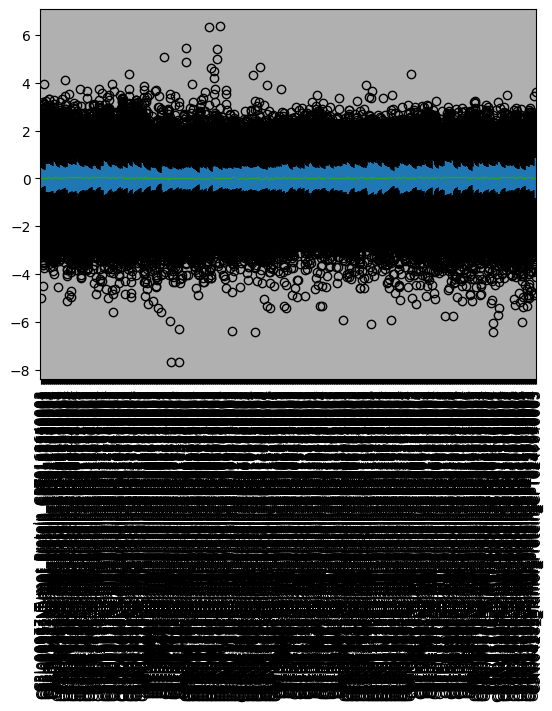

In [7]:
import matplotlib.pyplot as plt

df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [8]:
min_p = np.min(df.values)
print(min_p)
for c in df.columns:
    # 0 centering it
    df[c] = df[c].values + abs(min_p)


-7.691161657474988


In [13]:
sample_df['Stage'].value_counts()

Stage
Early    482
Late     260
Name: count, dtype: int64

In [9]:
df.to_csv('PanCan/PanCan_Protein.csv')
sample_df.to_csv('PanCan/PanCan_Protein_samples.csv', index=False)

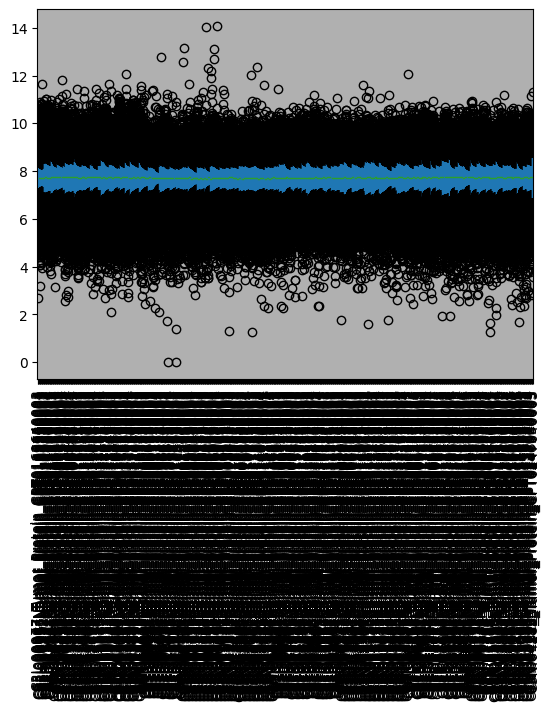

In [10]:

df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [15]:
df = pd.DataFrame()
sample_df = pd.DataFrame()
for c in cancers:
    cancer = c.replace(' ', '')
    s_df = pd.read_csv(f'{output_dir}{cancer}/{cancer}_filtered_samples_RNA.csv')
    d_df = pd.read_csv(f'{output_dir}{cancer}/{cancer}_filtered_RNA.csv', index_col=0)
    # Join all the filtered ones
    sample_df = pd.concat([sample_df, s_df])
    if len(df) == 0:
        df = d_df
    else:
        d_df.drop(columns=['gene_name'], inplace=True)
        df = df.join(d_df, how='inner')
df.to_csv('PanCan/PanCan_RNA.csv')
sample_df.to_csv('PanCan/PanCan_RNA_samples.csv', index=False)

In [16]:
df

,gene_name,C3N.01946_Normal_RNA_HeadandNeckSquamousCellCarcinoma_bd5e35ff.e842.4b62.9d28.b81460b43ff1,C3N.01946_Tumor_RNA_HeadandNeckSquamousCellCarcinoma_910baa78.f397.4251.86c3.be925f4dc26e,C3N.01754_Normal_RNA_HeadandNeckSquamousCellCarcinoma_842bbaaa.33ee.4ac2.bb01.e2efd53e7977,C3N.01754_Tumor_RNA_HeadandNeckSquamousCellCarcinoma_b4940d82.1efc.45e9.a309.1b6193677c27,C3L.01138_Tumor_RNA_HeadandNeckSquamousCellCarcinoma_f2b55581.fc93.4962.ab74.032e23cc7286,C3L.01138_Normal_RNA_HeadandNeckSquamousCellCarcinoma_c982f277.a9a1.4ad1.95f5.4c4ca07cfcc3,C3N.03888_Tumor_RNA_HeadandNeckSquamousCellCarcinoma_d06b6055.7a25.4d07.b504.0879410610f7,C3N.03888_Normal_RNA_HeadandNeckSquamousCellCarcinoma_87f3fd52.11c3.4472.b931.bcbc6f530449,C3N.04280_Tumor_RNA_HeadandNeckSquamousCellCarcinoma_2ff2c75a.c80b.49a6.8ea4.bb450800a2e9,...,C3N.00302_Tumor_RNA_PancreaticDuctalAdenocarcinoma_a7f435b5.865e.47ff.ad96.0dd5abb3c757,C3L.01031_Tumor_RNA_PancreaticDuctalAdenocarcinoma_830686dc.7464.4938.b9b5.0eab68f9243b,C3L.01662_Tumor_RNA_PancreaticDuctalAdenocarcinoma_a576d257.4756.4b52.b125.68cd35145fb8,C3N.01998_Normal_RNA_PancreaticDuctalAdenocarcinoma_29b6798e.d7fb.4514.a46c.b653924800cd,C3L.02463_Normal_RNA_PancreaticDuctalAdenocarcinoma_4266c29d.084b.41e8.9fd0.5f25f691e545,C3N.02592_Tumor_RNA_PancreaticDuctalAdenocarcinoma_0c9134db.6d91.4ce9.80cd.abeb400b8cd1,C3N.03000_Tumor_RNA_PancreaticDuctalAdenocarcinoma_a5e7b01e.7570.4066.9281.c89d59ed6df7,C3L.02897_Tumor_RNA_PancreaticDuctalAdenocarcinoma_7421a44e.749d.41f7.bfea.95acda66686f,C3N.03754_Tumor_RNA_PancreaticDuctalAdenocarcinoma_73a962fc.09d5.49ae.8704.e38d49d5227a,C3L.01703_Normal_RNA_PancreaticDuctalAdenocarcinoma_9ed4db45.79c8.4e45.84ba.3029d7eb8216
gene_id,,,,,,,,,,,,,,,,,,,,,
N_unmapped,0,1129834,1733388,1270953,11592965,38587406,2068693,24261613,1291268,7206207,...,1392731,1175159,1011358,1043989,1026055,995738,866822,954783,12690255,1408641
N_multimapping,0,8089230,10631247,7468692,6660759,7489572,9440659,8200264,8309032,10490464,...,11062897,11019700,13071643,11340479,9942687,11219660,6461062,12811454,13844694,9734601
N_noFeature,0,33562516,33195303,29577977,32973541,23952553,30517821,26109290,21386657,22048052,...,34818971,32383870,32830861,31915591,39194237,39107931,35454757,38731746,30968030,35489241
N_ambiguous,0,6058339,5832622,5642944,1709650,265079,6011280,1362915,6439333,5238066,...,5355743,8229419,8135669,8104992,7117660,4836046,5869380,5953589,5200752,7107541
ENSG00000000003.15,TSPAN6,11785,505,2574,1030,19,1791,766,6185,745,...,1548,1655,1527,1069,927,1698,1338,1942,1709,839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288637.1,AC013477.1,42,5,7,2,20,10,0,23,3,...,5,8,7,14,29,5,9,13,11,11
ENSG00000288662.1,AC092910.4,22,43,16,7,0,24,17,9,24,...,19,28,19,18,19,9,20,20,18,18
ENSG00000288663.1,AC073611.1,26,27,28,17,3,33,20,13,34,...,21,36,24,16,36,22,22,43,36,22


In [17]:
df = pd.DataFrame()
sample_df = pd.DataFrame()
for c in cancers:
    cancer = c.replace(' ', '')
    s_df = pd.read_csv(f'{output_dir}{cancer}/{cancer}_filtered_samples_CpG.csv')
    d_df = pd.read_csv(f'{output_dir}{cancer}/{cancer}_filtered_CpG.csv', index_col=0)
    # Join all the filtered ones
    sample_df = pd.concat([sample_df, s_df])
    if len(df) == 0:
        df = d_df
    else:
        df = df.join(d_df, how='inner')
df.to_csv('PanCan/PanCan_CpG.csv')
sample_df.to_csv('PanCan/PanCan_CpG_samples.csv', index=False)